In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df_energy = pd.read_csv("data/OWID_energy/owid-energy-data.csv")
print(df_energy["country"].value_counts())
print(df_energy.columns)

World          121
Peru           121
Romania        121
Colombia       121
Pakistan       121
              ... 
Palestine       23
South Sudan     21
Kosovo          20
Montenegro      20
Timor           14
Name: country, Length: 242, dtype: int64
Index(['iso_code', 'country', 'year', 'coal_prod_change_pct',
       'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct',
       ...
       'solar_elec_per_capita', 'solar_energy_per_capita', 'gdp',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=122)


In [13]:
df_co2 = pd.read_csv("data/OWID_CO2/owid-co2-data.csv")
print(df_co2["country"].value_counts())
print(df_co2.columns)

World                   271
United Kingdom          271
EU-28                   271
Europe (excl. EU-27)    271
Europe                  271
                       ... 
Micronesia (country)     29
Micronesia               27
Wallis and Futuna        20
Timor                    19
Kosovo                   13
Name: country, Length: 244, dtype: int64
Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
 

In [75]:
relevant_energy = df_energy[["iso_code", "country", "year",
                             "gdp", "population",
                             "primary_energy_consumption", "electricity_generation",
                             "energy_per_gdp", "energy_per_capita",
                             "nuclear_electricity", "nuclear_share_elec",
                             "nuclear_consumption", "nuclear_share_energy"]]
relevant_co2 = df_co2[["iso_code", "country", "year",
                       "population", "gdp", "primary_energy_consumption",
                       "co2", "methane", "total_ghg"]]

joined = relevant_energy.join(
    relevant_co2.set_index(["iso_code", "country", "year"]),
    on = ["iso_code", "country", "year"], rsuffix = "_co2", lsuffix = "_energy"
).set_index(["iso_code", "country", "year"])

In [76]:
value_exists = joined[joined["co2"].notna()].groupby(["iso_code", "year"]).count()
(value_exists == 0).sum()

comparevals = ["gdp", "population", "primary_energy_consumption"]
energy_vals = [x+"_energy" for x in comparevals]
co2_vals = [x+"_co2" for x in comparevals]

val_diffs = (joined[energy_vals] - joined[co2_vals].values)[joined["primary_energy_consumption_energy"].notna()]
mean_diff = val_diffs.groupby("country").mean()
max_vals = joined[joined["primary_energy_consumption_energy"].notna()][energy_vals].groupby("country").max() * 100

relative_diff = mean_diff / max_vals.loc[mean_diff.index] * 100
print(relative_diff["gdp_energy"][relative_diff["gdp_energy"].isna()].index)

print(relative_diff["gdp_energy"].dropna().abs().sort_values())

# while the values for GDP as well as population differ somewhat between the two datasets, these differences are relatively small.
# For lack of a better option, the differences will remain reconciled, and the data from the Energy dataset considered
# authorative, as it also forms the basis for all other considerations in this project.

df = joined[energy_vals +
            [x for x in relevant_energy.columns if x not in comparevals and x not in joined.index.names] +
            [x for x in relevant_co2.columns if x not in comparevals and x not in joined.index.names]]
df.columns = comparevals + list(df.columns[3:])

Index(['Africa', 'American Samoa', 'Antigua and Barbuda', 'Aruba',
       'Asia Pacific', 'Bahamas', 'Belize', 'Bermuda', 'Bhutan',
       'British Virgin Islands', 'Brunei', 'CIS', 'Cayman Islands',
       'Central America', 'Cook Islands', 'Czechoslovakia', 'Eastern Africa',
       'Eritrea', 'Europe', 'Europe (other)', 'Faeroe Islands',
       'Falkland Islands ', 'Fiji', 'French Guiana', 'French Polynesia',
       'Gibraltar', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guyana',
       'Kiribati', 'Kosovo', 'Macau', 'Maldives', 'Martinique',
       'Middle Africa', 'Middle East', 'Montserrat', 'Nauru',
       'Netherlands Antilles', 'New Caledonia', 'Niue', 'North America',
       'Northern Mariana Islands', 'OPEC', 'Other Asia & Pacific', 'Other CIS',
       'Other Caribbean', 'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa', 'Papua New Guinea',
       'Reunion', 'Saint Helena', 'Saint Kitts and Nevis',
       'Saint Pierre and

In [83]:
data = df[["population", "gdp", "co2", "total_ghg",
           "primary_energy_consumption", "electricity_generation",
           "nuclear_consumption", "nuclear_electricity"]]

data["co2_per_capita"] = df["co2"] / df["population"]
data["co2_per_gdp"] = df["co2"] / df["gdp"]
data["total_ghg_per_capita"] = df["total_ghg"] / df["population"]
data["total_ghg_per_gdp"] = df["total_ghg"] / df["gdp"]
data["energy_per_capita"] = df["primary_energy_consumption"] / df["population"]
data["energy_per_gdp"] = df["primary_energy_consumption"] / df["gdp"]
data["electricity_per_capita"] = df["electricity_generation"] / df["population"]
data["electricity_per_gdp"] = df["electricity_generation"] / df["gdp"]

data["nuclear_consumption_per_capita"] = df["nuclear_consumption"] / df["population"]
data["nuclear_consumption_per_gdp"] = df["nuclear_consumption"] / df["gdp"]
data["nuclear_electricity_per_capita"] = df["nuclear_electricity"] / df["population"]
data["nuclear_electricity_per_gdp"] = df["nuclear_electricity"] / df["gdp"]

data["nuclear_energy_share"] = df["nuclear_consumption"] / df["primary_energy_consumption"]
data["nuclear_electricity_share"] = df["nuclear_electricity"] / df["electricity_generation"]

<ipython-input-83-e28abbb1bb62>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["co2_per_capita"] = df["co2"] / df["population"]
<ipython-input-83-e28abbb1bb62>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["co2_per_gdp"] = df["co2"] / df["gdp"]
<ipython-input-83-e28abbb1bb62>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [127]:
nuclear_countries = data[data["nuclear_consumption"] > 0].groupby(["iso_code", "country"]).any().index
country_info = pd.DataFrame(index=nuclear_countries)
total_nuclear_energy = data["nuclear_consumption"].reset_index().groupby(["iso_code","country"]).sum().drop("year", axis=1)
country_info["total_nuclear_energy"] = total_nuclear_energy.loc[country_info.index]
total_energy = data["primary_energy_consumption"].reset_index().groupby(["iso_code","country"]).sum().drop("year", axis=1)
country_info["total_energy"] = total_energy.loc[country_info.index]
country_info["lifetime_nuclear_share"] = country_info["total_nuclear_energy"] / country_info["total_energy"]

country_info.sort_values(by="lifetime_nuclear_share")

,,total_nuclear_energy,total_energy,lifetime_nuclear_share
iso_code,country,,,
KAZ,Kazakhstan,6.913,23264.028,0.000297
IRN,Iran,101.331,68665.291,0.001476
ITA,Italy,249.701,96912.559,0.002577
CHN,China,5963.849,742644.728,0.008031
BRA,Brazil,805.832,97896.846,0.008231
NLD,Netherlands,479.724,49581.065,0.009676
IND,India,1762.044,182071.683,0.009678
MEX,Mexico,715.345,71764.386,0.009968
PAK,Pakistan,228.372,22064.271,0.010350


<ipython-input-140-54dcc1116d71>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  france = data.loc[("FRA", "France")]


<AxesSubplot:xlabel='year'>

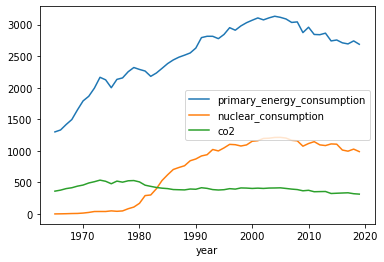

In [140]:
france = data.loc[("FRA", "France")]
france[["primary_energy_consumption", "nuclear_consumption", "co2"]].dropna(how="any", axis=0).plot()